In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

Data Preprocessing

In [3]:
crop_data = pd.read_csv("Crop_recommendation.csv")
crop_data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
crop_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [5]:
crop_data.duplicated().sum()

np.int64(0)

In [6]:
crop_data.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [7]:
crop_data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
crop_data['label'].value_counts().to_frame()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [10]:
crop_data.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

Encoding categorical labels to numeric values using the pandas factorize method. This method automatically assigns integer values to unique categorie


In [ ]:
crop_names = {
    "rice": 0, "maize": 1,"jute": 2, "cotton": 3,
    "coconut": 4, "papaya": 5, "orange": 6, "apple": 7,
    "muskmelon": 8,"watermelon": 9, "grapes": 10, "mango": 11,
    "banana": 12, "pomegranate": 13, "lentil": 14, "blackgram": 15,
    "mungbean": 16,
    "mothbeans": 17,
    "pigeonpeas": 18,
    "kidneybeans": 19,
    "chickpea": 20,
    "coffee": 21,
    "peas":22,
    "cowpeas":23,
    "groundnuts":24,
    "beans":25,
    "Soyabeans":26,
    "wheat":27,
    'tobacco':28
}
crop_data['label'] = crop_data['label'].map(crop_names)
crop_data.label.unique()


array([ 0,  1, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,
        5,  4,  3,  2, 21])

Graphical Representation to see outlayers

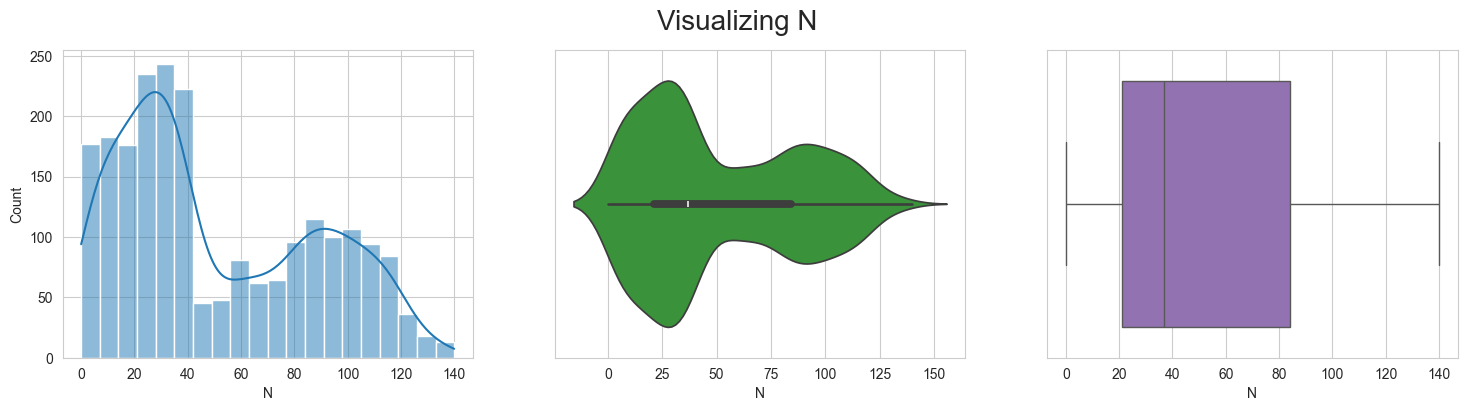

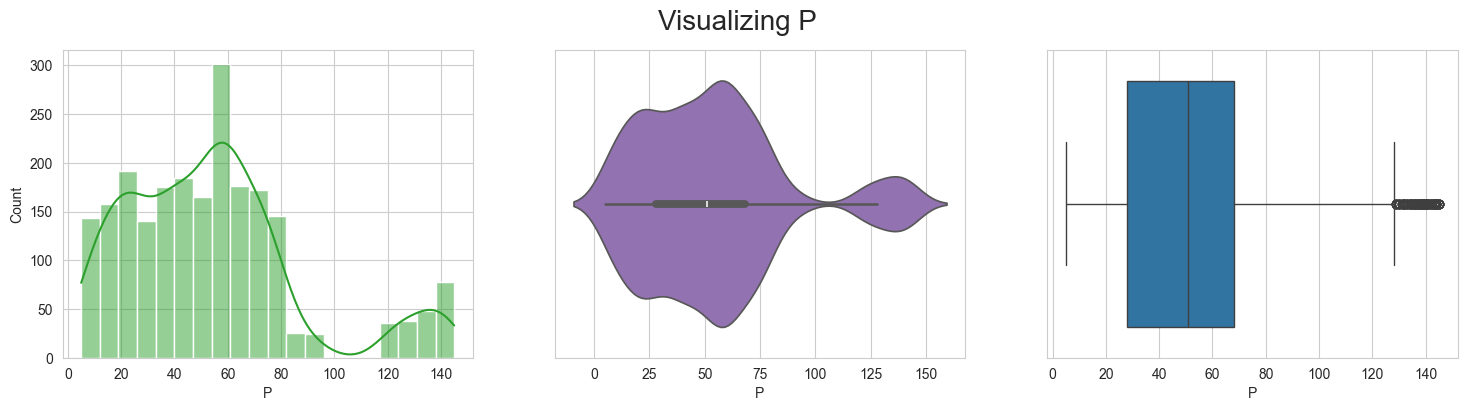

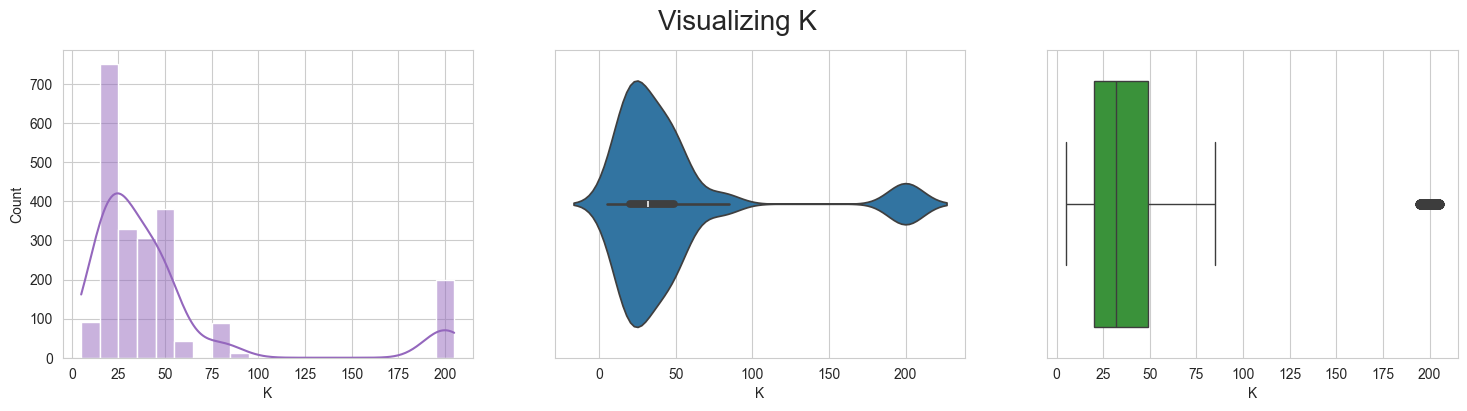

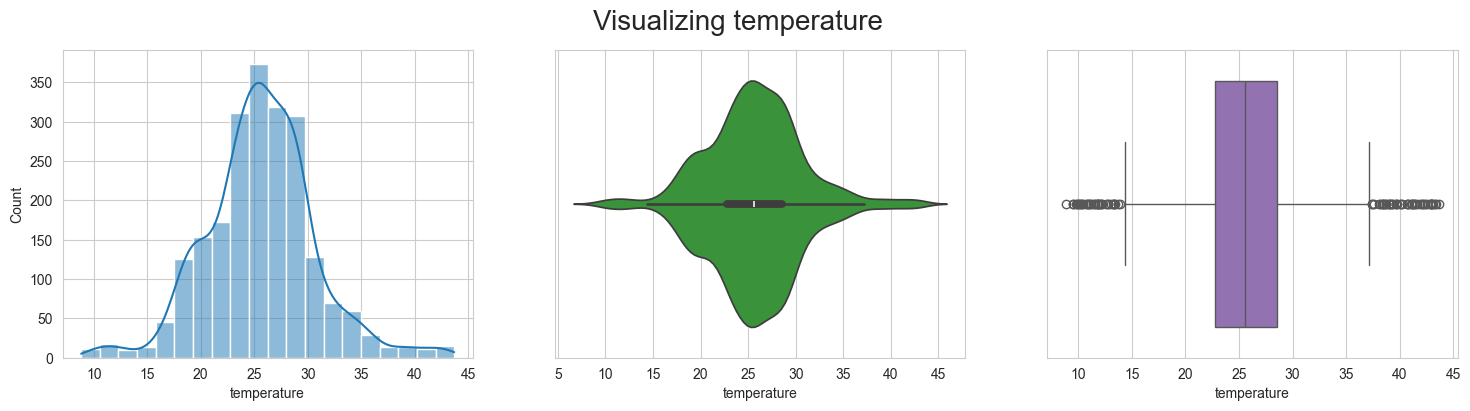

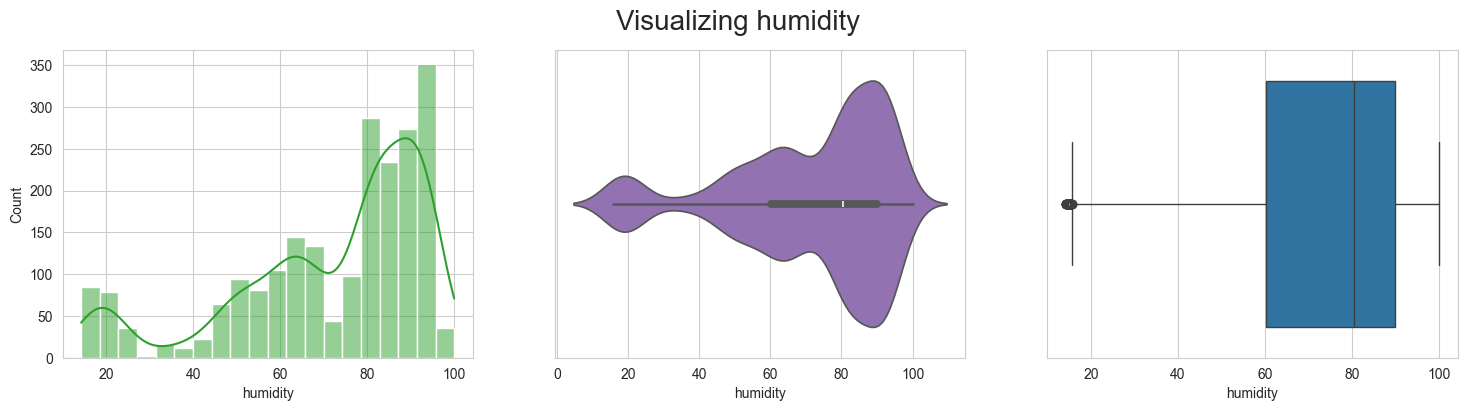

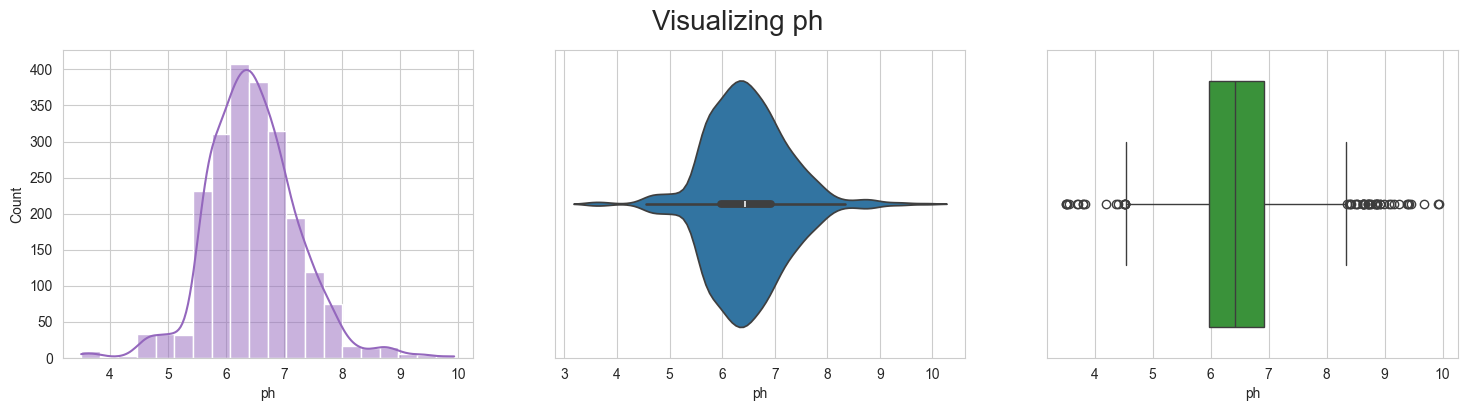

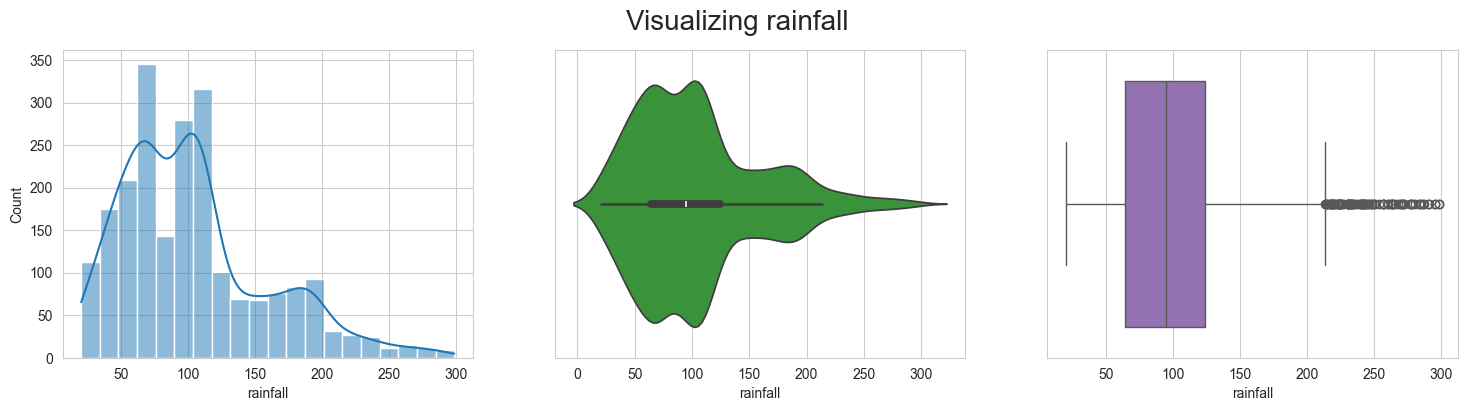

In [12]:
sns.set_style('whitegrid')
colors = ['#1f77b4', '#2ca02c', '#9467bd'] 

for index, i in enumerate(crop_data.columns[:-1]):
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    # kde is Kernel Density Estimate it shows the probability density function of the data.

    sns.histplot(data=crop_data,x=i,kde=True,bins=20,color=colors[index % 3],ax=ax[0]) 
    sns.violinplot(data=crop_data,x=i,color=colors[(index+1) % 3],ax=ax[1])
    sns.boxplot(data=crop_data,x=i,color=colors[(index+2) % 3],ax=ax[2])
    
    plt.suptitle(f'Visualizing {i}',size=20)

In [13]:

# Assuming crop_data is your DataFrame
for col in crop_data.columns:
    if crop_data[col].dtype in ['float64', 'int64']:  # Ensure column is numeric
        Q1 = crop_data[col].quantile(0.25)  # 25th percentile
        Q3 = crop_data[col].quantile(0.75)  # 75th percentile
        IQR = Q3 - Q1                       # Interquartile Range
        lower_bound = Q1 - 1.5 * IQR        # Lower bound
        upper_bound = Q3 + 1.5 * IQR        # Upper bound
        
        # Filter out the outliers
        crop_data = crop_data[(crop_data[col] >= lower_bound) & (crop_data[col] <= upper_bound)]



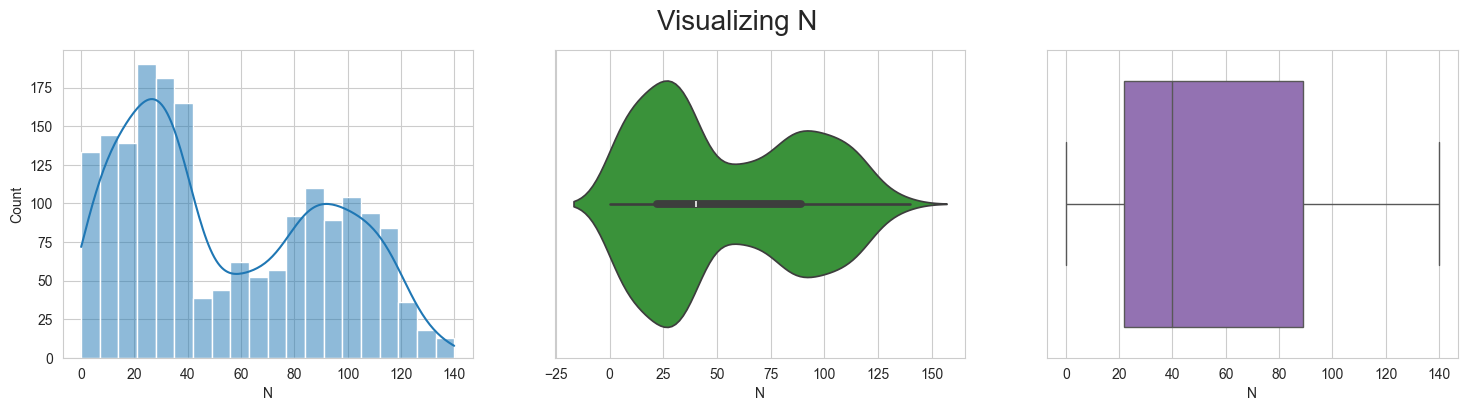

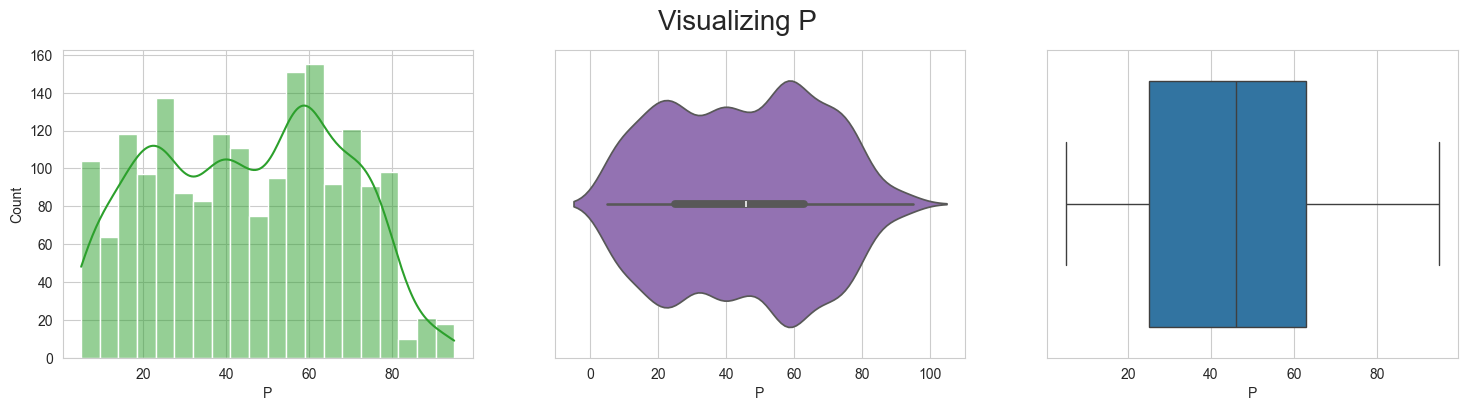

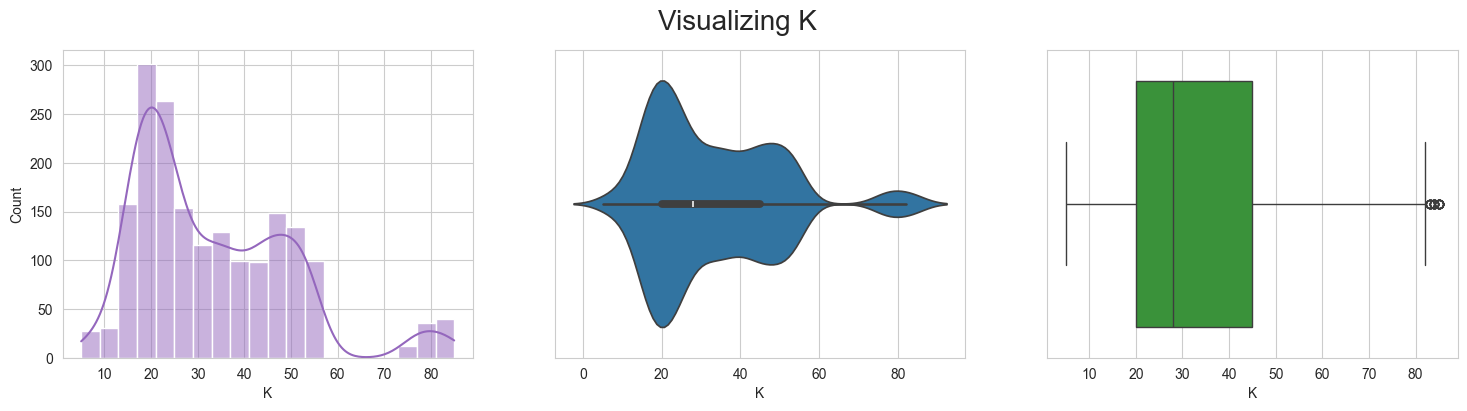

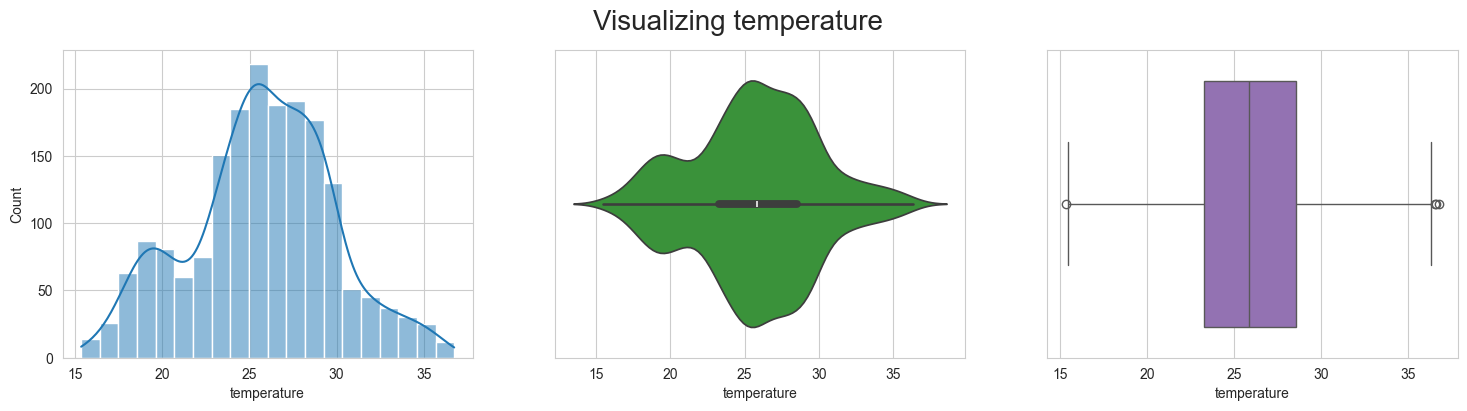

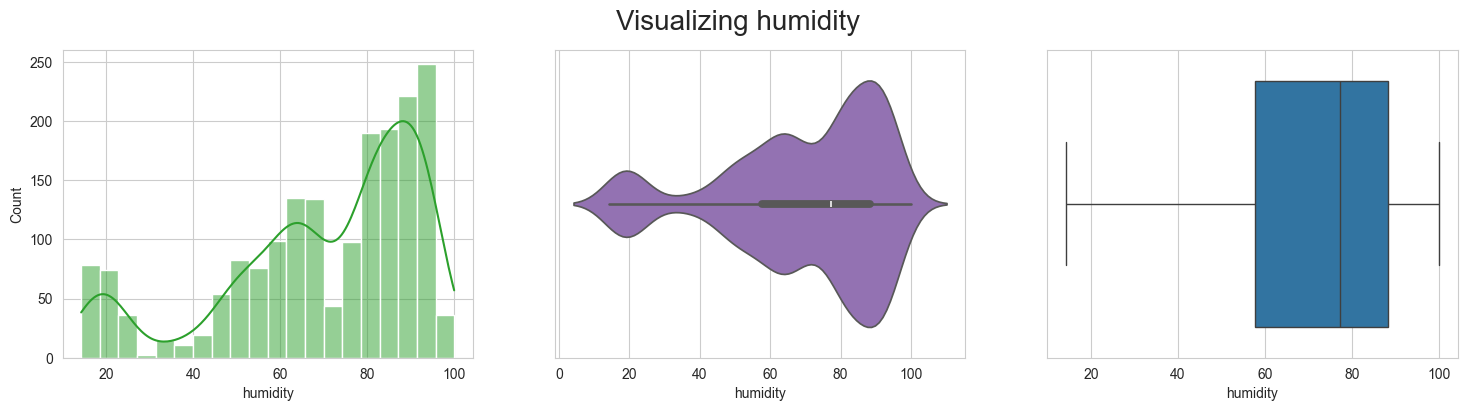

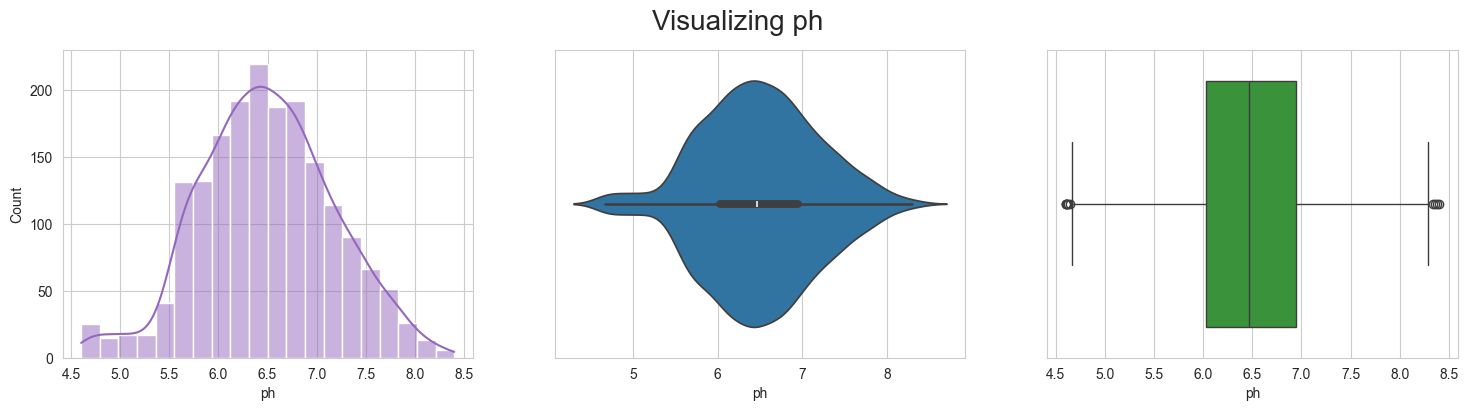

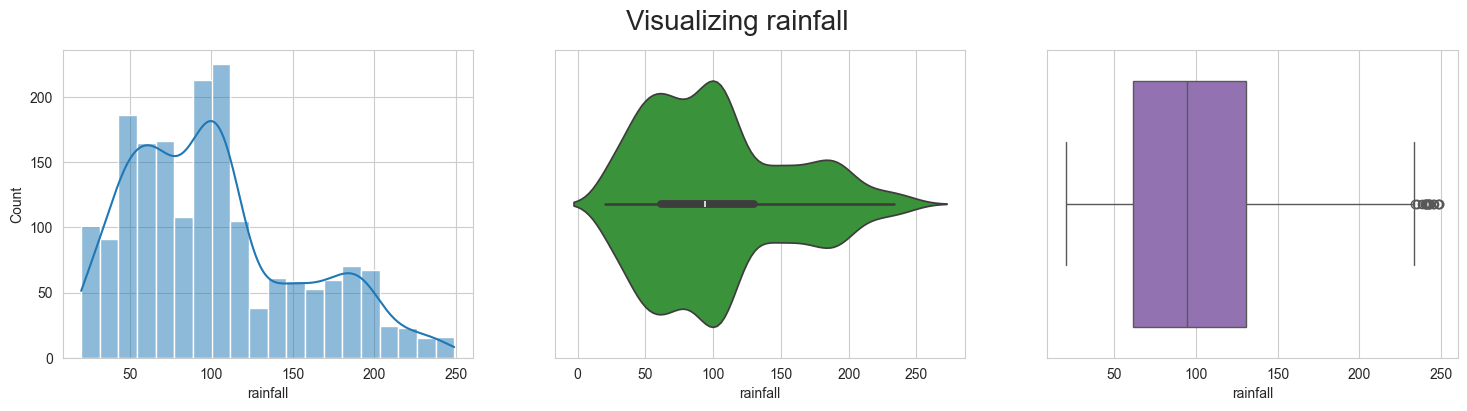

In [14]:
sns.set_style('whitegrid')
colors = ['#1f77b4', '#2ca02c', '#9467bd'] 

for index, i in enumerate(crop_data.columns[:-1]):
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    # kde is Kernel Density Estimate it shows the probability density function of the data.

    sns.histplot(data=crop_data,x=i,kde=True,bins=20,color=colors[index % 3],ax=ax[0]) 
    sns.violinplot(data=crop_data,x=i,color=colors[(index+1) % 3],ax=ax[1])
    sns.boxplot(data=crop_data,x=i,color=colors[(index+2) % 3],ax=ax[2])
    
    plt.suptitle(f'Visualizing {i}',size=20)


A correlation heatmap is particularly useful for understanding how different features such as soil nutrients, temperature, and humidity are correlated with each other. This can help identify which factors are strongly associated with the crop type.

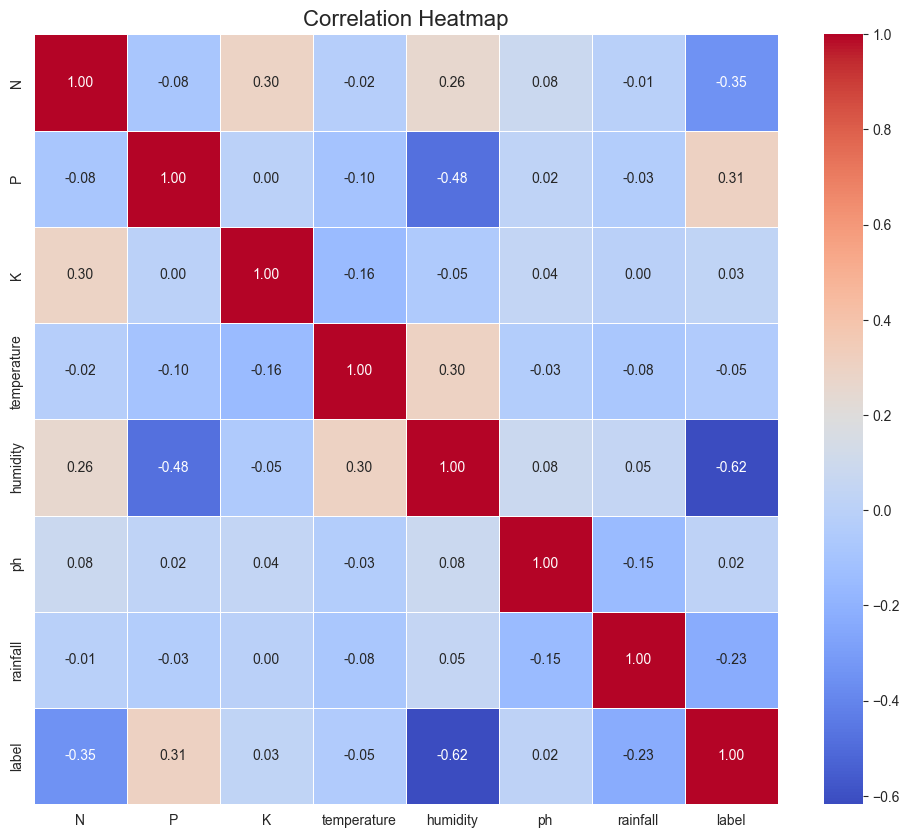

In [15]:
correlation = crop_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', size=16)
plt.show()

In [16]:
crop_data.corr()['label'].to_frame()

,label
N,-0.346714
P,0.310009
K,0.032712
temperature,-0.048706
humidity,-0.617652
ph,0.017284
rainfall,-0.227448
label,1.000000


In [17]:
X = crop_data.drop('label', axis = 1)
y = crop_data['label']

In [18]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
3,74,35,40,26.491096,80.158363,6.980401,242.864034
7,94,53,40,20.277744,82.894086,5.718627,241.974195
8,89,54,38,24.515881,83.535216,6.685346,230.446236


In [19]:
y.head()

0    0
1    0
3    0
7    0
8    0
Name: label, dtype: int64

TRAIN TEST SPLIT

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [21]:
X_train.shape

(1476, 7)

In [22]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(X_train)
X_test = mx.transform(X_test)

In [23]:
y_train


1932     3
684     16
1046    12
1336     9
1815     4
        ..
1328     9
1492     8
954     13
1813     4
1324     9
Name: label, Length: 1476, dtype: int64

STANDARD SCALER


In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [25]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [26]:
models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [27]:
import time
for name, model in models.items():
    start_time = time.time()  # Record the start time
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy score
    score = accuracy_score(y_test, y_pred)
    
    # Measure the time elapsed
    elapsed_time = time.time() - start_time
    
    # Print the accuracy and time for each model
    print(f"{name} model - Accuracy: {score:.4f}, Time: {elapsed_time:.4f} seconds")

LogisticRegression model - Accuracy: 0.9811, Time: 0.3078 seconds
GaussianNB model - Accuracy: 0.9973, Time: 0.0114 seconds
SVC model - Accuracy: 0.9892, Time: 0.1504 seconds
KNeighborsClassifier model - Accuracy: 0.9730, Time: 0.1032 seconds
DecisionTreeClassifier model - Accuracy: 0.9919, Time: 0.0612 seconds
ExtraTreeClassifier model - Accuracy: 0.9135, Time: 0.0104 seconds
RandomForestClassifier model - Accuracy: 0.9919, Time: 0.7671 seconds
BaggingClassifier model - Accuracy: 0.9811, Time: 0.4156 seconds
GradientBoostingClassifier model - Accuracy: 0.9892, Time: 20.5362 seconds


e:\python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier model - Accuracy: 0.1568, Time: 0.6112 seconds


In [28]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9945945945945946

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       1.00      1.00      1.00        17
           2       0.83      1.00      0.91        10
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        22
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00        13
          11       1.00      1.00      1.00        13
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        18
          15       1.00      1.00      1.00        16
          16       1.00      1.00      1.00        24
          17       1.00      1.00      1.00        11
          18       1.00      1.00      1.00        27
    

In [31]:
def recommendation(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    mx_features = mx.fit_transform(features)
    sc_mx_features = sc.fit_transform(mx_features)
    prediction = randclf.predict(sc_mx_features).reshape(1,-1)
    return prediction[0]

In [32]:
crop_data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,0
7,94,53,40,20.277744,82.894086,5.718627,241.974195,0
8,89,54,38,24.515881,83.535216,6.685346,230.446236,0


In [33]:
N=90
P= 42
K= 43
temperature= 20.879744
humidity=82.002744
ph=6.502985
rainfall=202.935536

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

In [34]:
predict

array([11])

The pickle library to serialize and save Python objects into files. This process is commonly used for persisting machine learning models and pre-processing objects so they can be loaded later for inference without retraining or reprocessing.

In [35]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(mx, open('minmaxscaler.pkl', 'wb'))
pickle.dump(sc, open('standscaler.pkl', 'wb'))

In [36]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# # Plot the confusion matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)

# plt.title('Confusion Matrix - Random Forest Classifier', size=16)
# plt.xlabel('Predicted Labels', size=14)
# plt.ylabel('True Labels', size=14)
# plt.show()

# # Display the diagonal elements
# print("Diagonal elements (True Predictions):", np.diag(conf_matrix))
# print("Sum of true predictions (accuracy matches):", np.trace(conf_matrix))


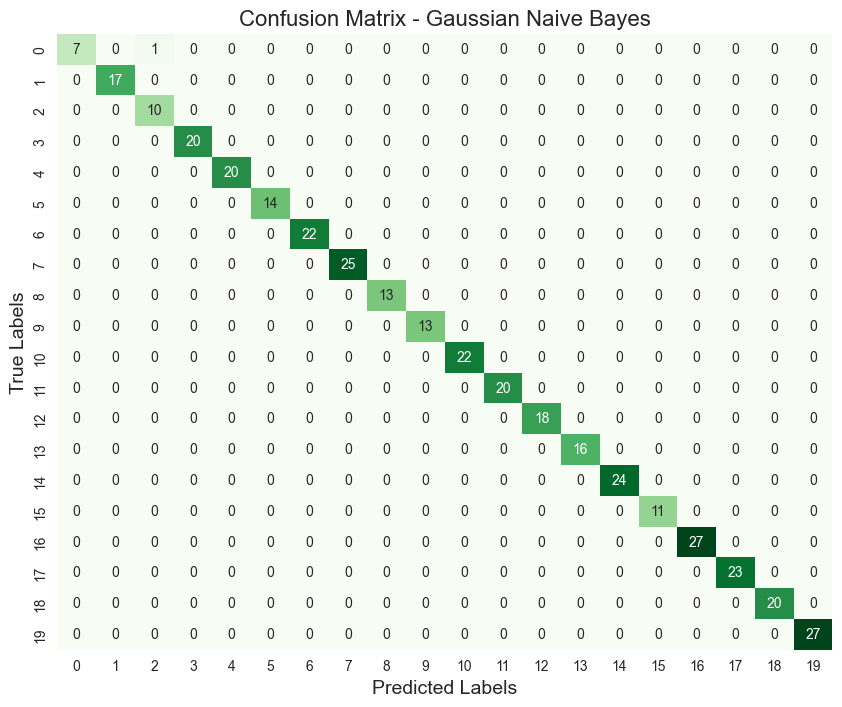

Diagonal elements (True Predictions): [ 7 17 10 20 20 14 22 25 13 13 22 20 18 16 24 11 27 23 20 27]
Sum of true predictions (accuracy matches): 369


In [37]:
# Import required modules
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Train the GaussianNB model
gnb.fit(X_train, y_train)

# Predict using the GaussianNB model
y_pred_gnb = gnb.predict(X_test)

# Generate the confusion matrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_gnb, annot=True, fmt='d', cmap='Greens', cbar=False)

plt.title('Confusion Matrix - Gaussian Naive Bayes', size=16)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('True Labels', size=14)
plt.show()

# Display the diagonal elements
print("Diagonal elements (True Predictions):", np.diag(conf_matrix_gnb))
print("Sum of true predictions (accuracy matches):", np.trace(conf_matrix_gnb))


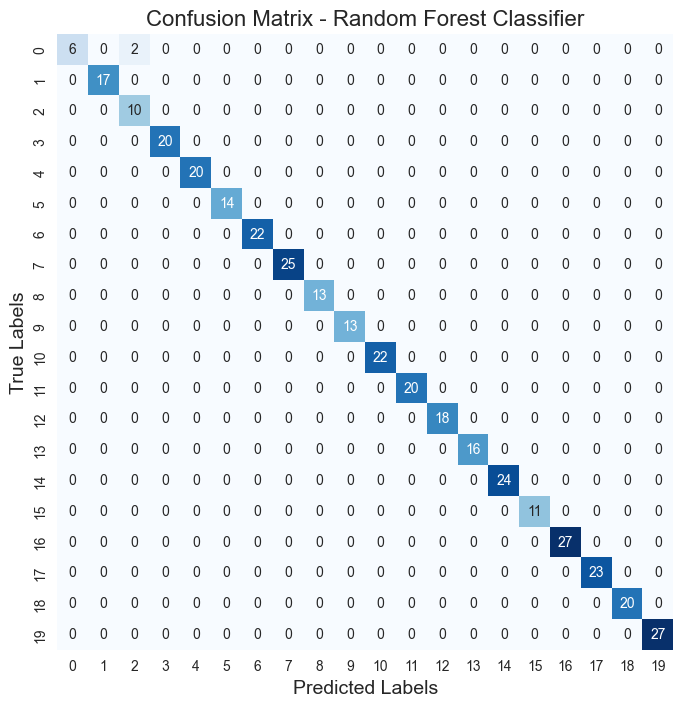

Diagonal elements (True Predictions): [ 6 17 10 20 20 14 22 25 13 13 22 20 18 16 24 11 27 23 20 27]
Sum of true predictions (accuracy matches): 368


In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the confusion matrix for Random Forest Classifier
conf_matrix_rf = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)

plt.title('Confusion Matrix - Random Forest Classifier', size=16)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('True Labels', size=14)
plt.show()

# Display additional details
print("Diagonal elements (True Predictions):", np.diag(conf_matrix_rf))
print("Sum of true predictions (accuracy matches):", np.trace(conf_matrix_rf))



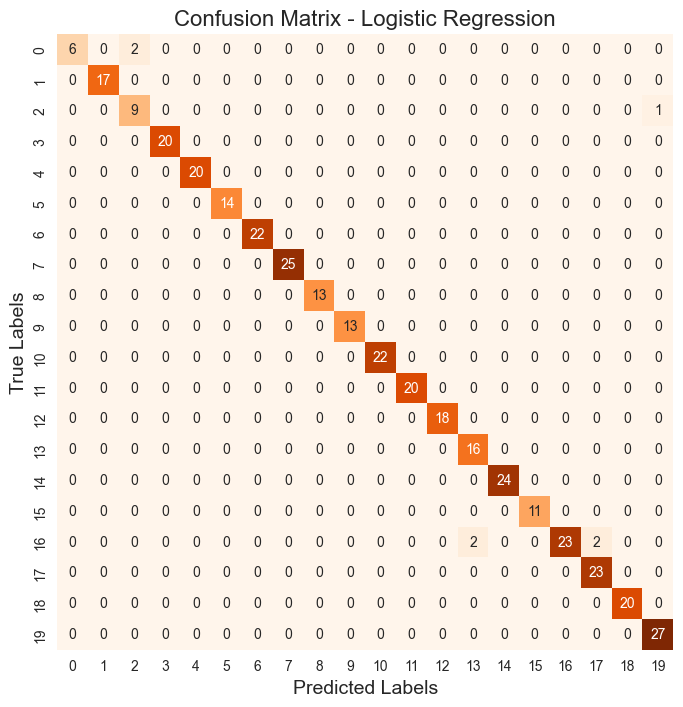

Diagonal elements (True Predictions): [ 6 17  9 20 20 14 22 25 13 13 22 20 18 16 24 11 23 23 20 27]
Sum of true predictions (accuracy matches): 363


In [39]:
# Import necessary modules
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Retrieve Logistic Regression model from the dictionary
log_reg = models['LogisticRegression']

# Make predictions using Logistic Regression
y_pred_lr = log_reg.predict(X_test)

# Generate the confusion matrix for Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Oranges', cbar=False, square=True)

plt.title('Confusion Matrix - Logistic Regression', size=16)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('True Labels', size=14)
plt.show()

# Display additional details
print("Diagonal elements (True Predictions):", np.diag(conf_matrix_lr))
print("Sum of true predictions (accuracy matches):", np.trace(conf_matrix_lr))


LogisticRegression model - Accuracy: 0.9811, Time: 0.1619 seconds
GaussianNB model - Accuracy: 0.9973, Time: 0.0104 seconds
RandomForestClassifier model - Accuracy: 0.9946, Time: 0.8385 seconds
DecisionTreeClassifier model - Accuracy: 0.9919, Time: 0.0243 seconds


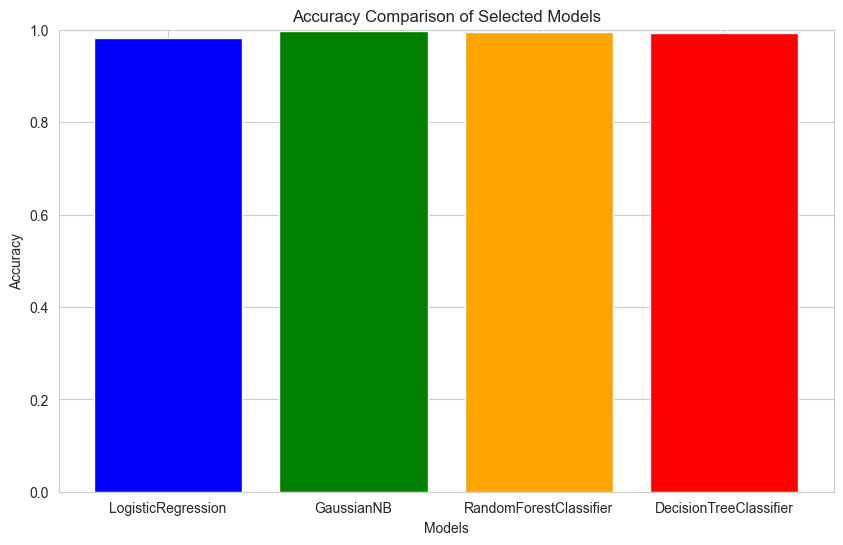

In [40]:
import matplotlib.pyplot as plt

# Define the selected models
selected_models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

# Store results
model_accuracies = {}
model_times = {}

# Train and test each model
for name, model in selected_models.items():
    start_time = time.time()  # Start timer
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    # Record accuracy and elapsed time
    model_accuracies[name] = score
    model_times[name] = time.time() - start_time

    # Print accuracy and time for each model
    print(f"{name} model - Accuracy: {score:.4f}, Time: {model_times[name]:.4f} seconds")

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'orange', 'red'])
plt.title("Accuracy Comparison of Selected Models")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()


LogisticRegression model - Accuracy: 0.9811, Time: 0.1105 seconds
GaussianNB model - Accuracy: 0.9973, Time: 0.0088 seconds
RandomForestClassifier model - Accuracy: 0.9946, Time: 0.9112 seconds
DecisionTreeClassifier model - Accuracy: 0.9919, Time: 0.0227 seconds
SVC model - Accuracy: 0.9892, Time: 0.1591 seconds


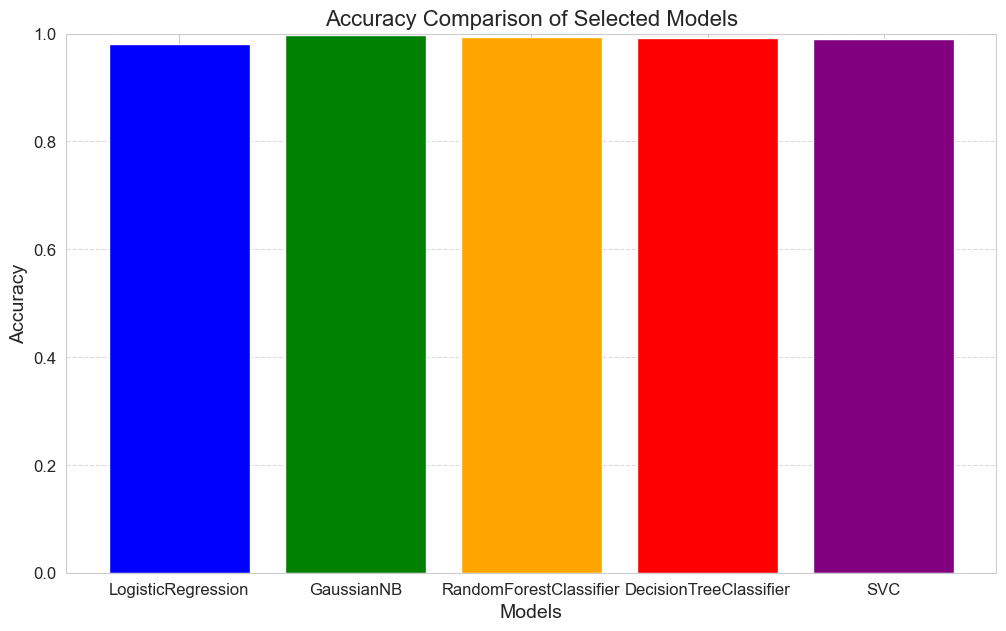

In [41]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Define the selected models
selected_models = {
    'LogisticRegression': LogisticRegression(),
    'GaussianNB': GaussianNB(),
    'RandomForestClassifier': RandomForestClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVC': SVC()
}

# Store results
model_accuracies = {}
model_times = {}

# Train and test each model
for name, model in selected_models.items():
    start_time = time.time()  # Start timer
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Test the model
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    
    # Record accuracy and elapsed time
    model_accuracies[name] = score
    model_times[name] = time.time() - start_time

    # Print accuracy and time for each model
    print(f"{name} model - Accuracy: {score:.4f}, Time: {model_times[name]:.4f} seconds")

# Plot the accuracies
plt.figure(figsize=(12, 7))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title("Accuracy Comparison of Selected Models", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


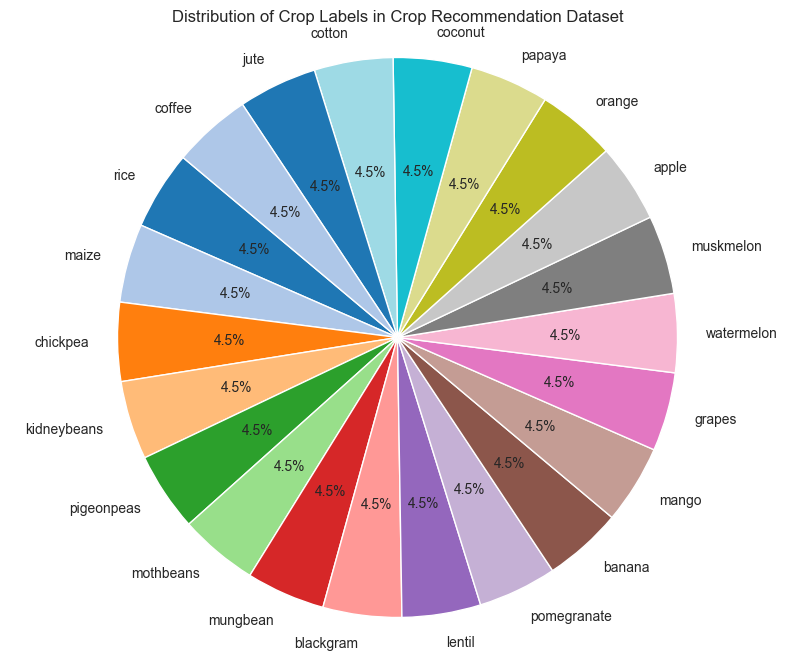

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
crop_data = pd.read_csv("Crop_recommendation.csv")

# Count the occurrences of each crop label
crop_counts = crop_data['label'].value_counts()

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(crop_counts, labels=crop_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Distribution of Crop Labels in Crop Recommendation Dataset")
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()


e:\python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


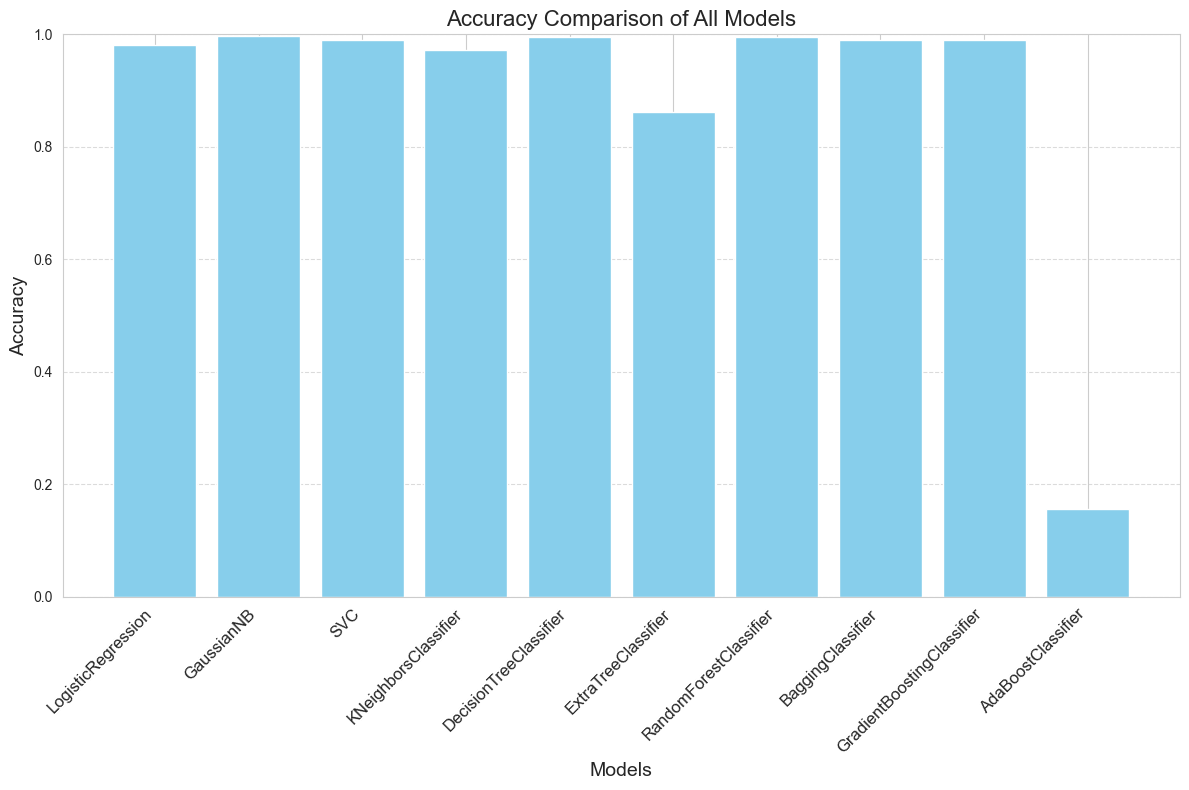

In [43]:
# Store the accuracies of all models
all_model_accuracies = {}

# Train and test each model, and record the accuracies
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    all_model_accuracies[name] = accuracy

# Plot the accuracies
plt.figure(figsize=(12, 8))
plt.bar(all_model_accuracies.keys(), all_model_accuracies.values(), color='skyblue')
plt.title("Accuracy Comparison of All Models", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


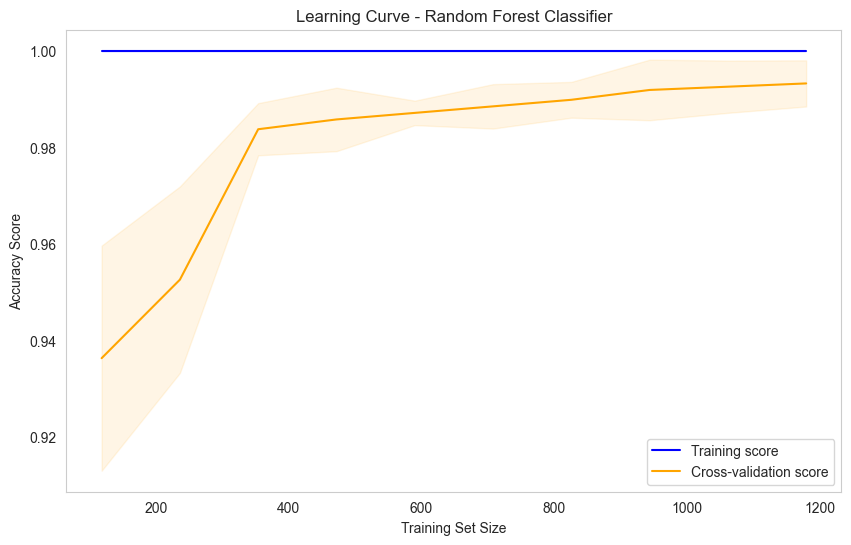

In [44]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Define the model
random_forest = RandomForestClassifier(random_state=42)

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    random_forest, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='orange')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')

# Add plot labels and title
plt.title("Learning Curve - Random Forest Classifier")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.grid()
plt.show()


e:\python\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\python\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\python\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\python\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\python\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\python\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
e:\python\Lib\site-pac

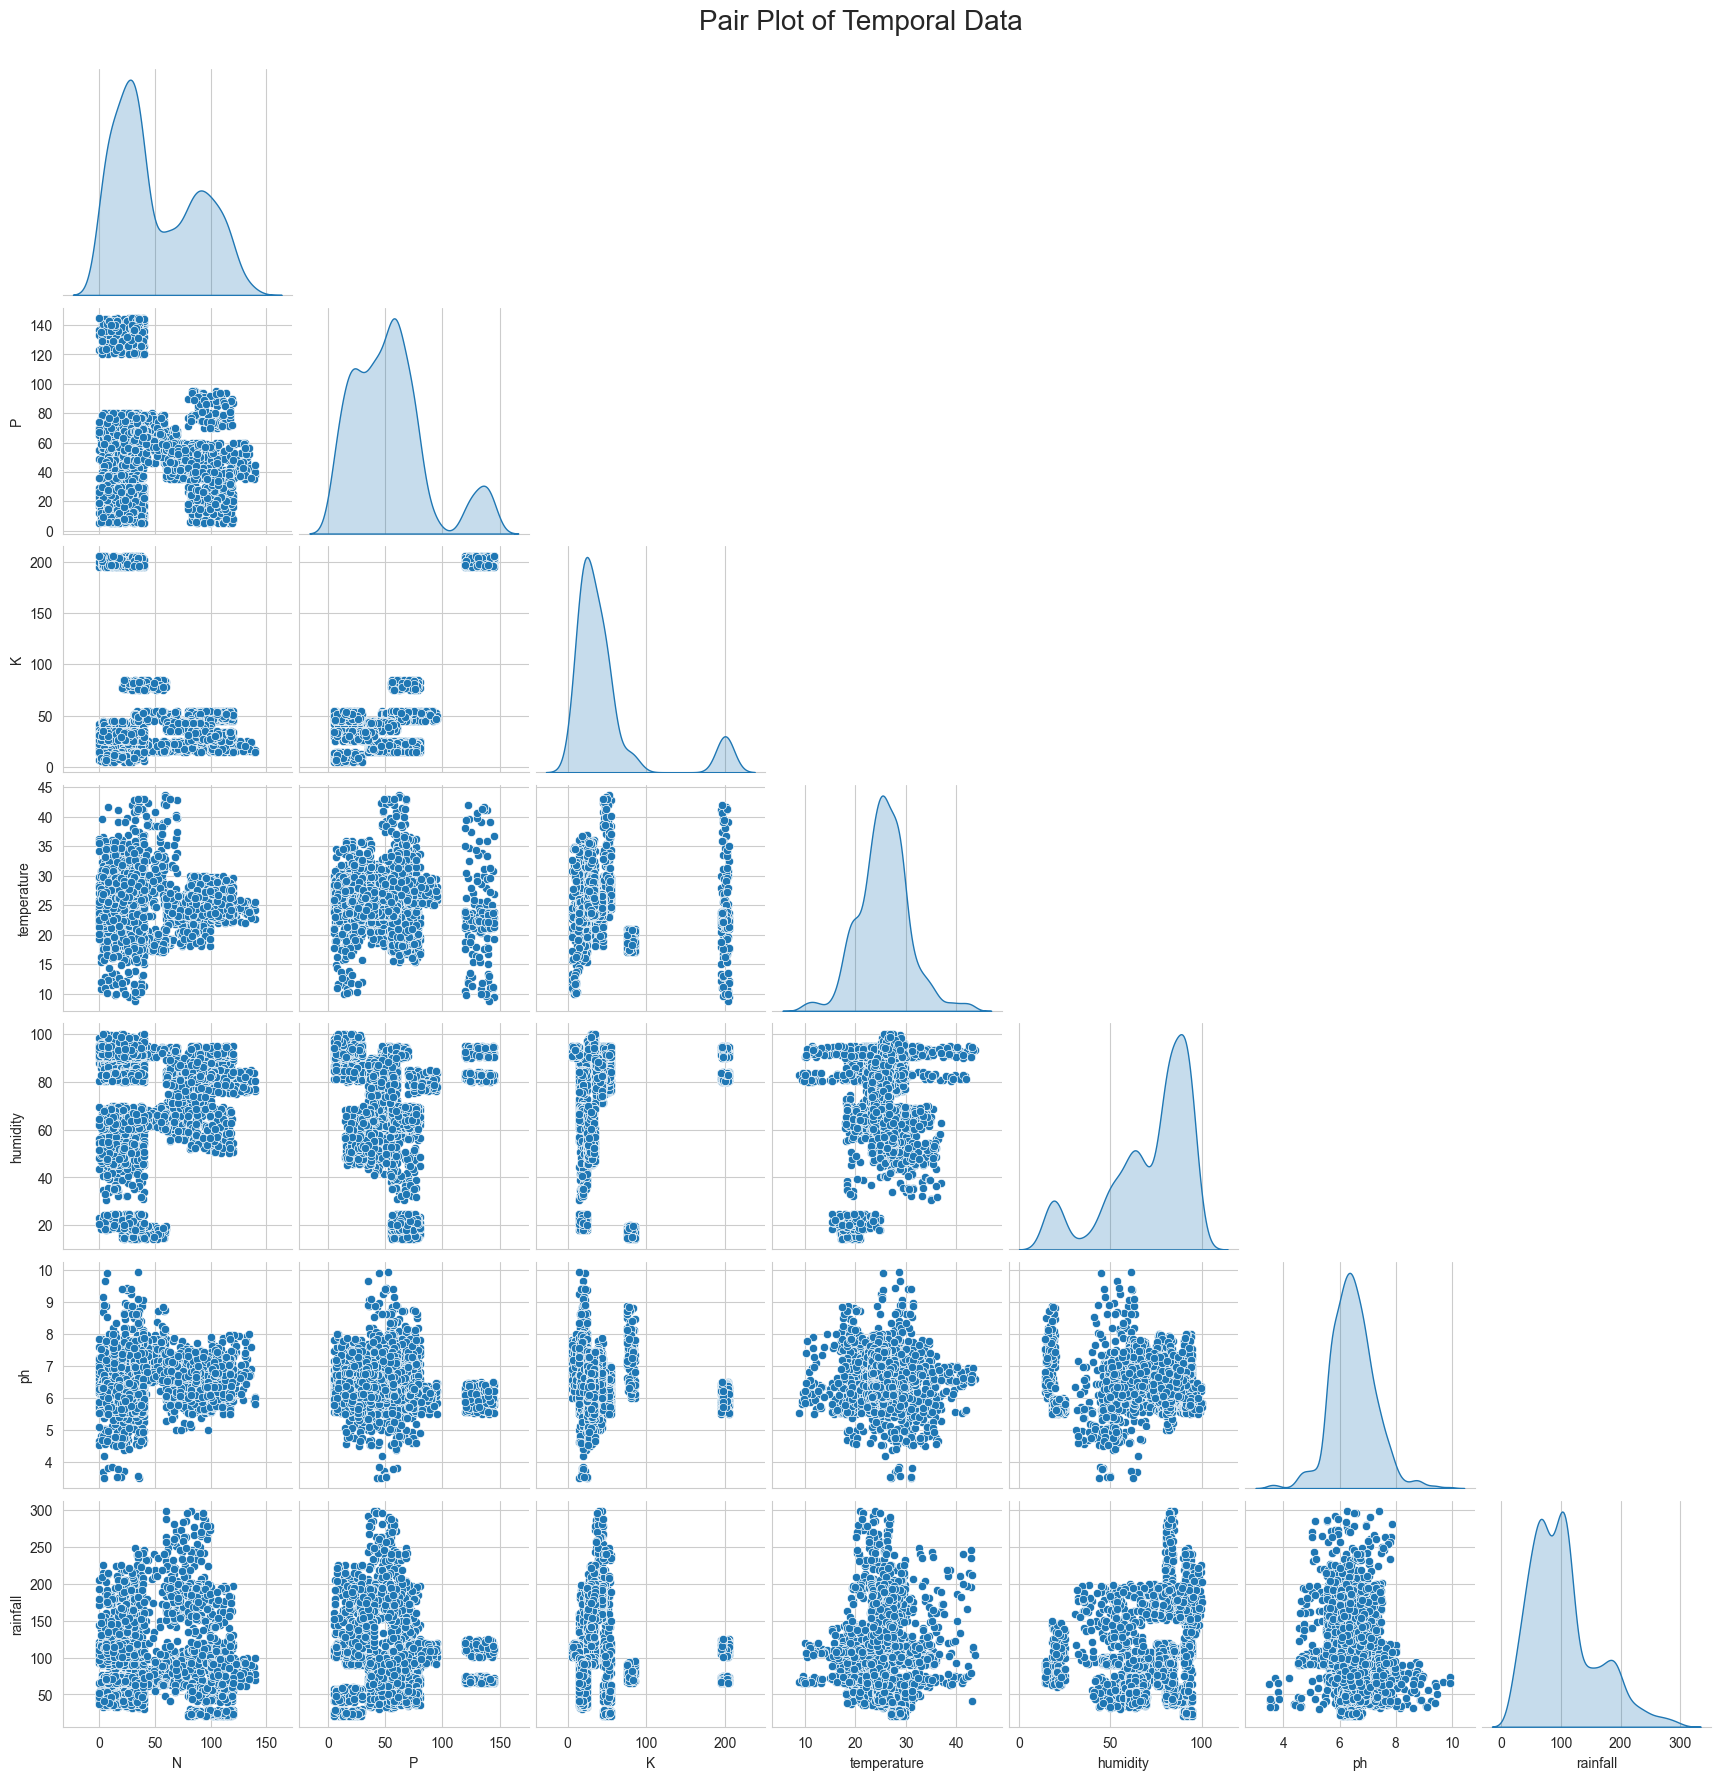

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming `crop_data` is the preprocessed DataFrame
# Select numeric columns for the pair plot
numeric_columns = crop_data.select_dtypes(include=['float64', 'int64']).columns

# Create a pair plot
sns.pairplot(crop_data[numeric_columns], diag_kind='kde', corner=True, palette='viridis')

# Add a title to the plot
plt.suptitle("Pair Plot of Temporal Data", size=20, y=1.02)

plt.show()


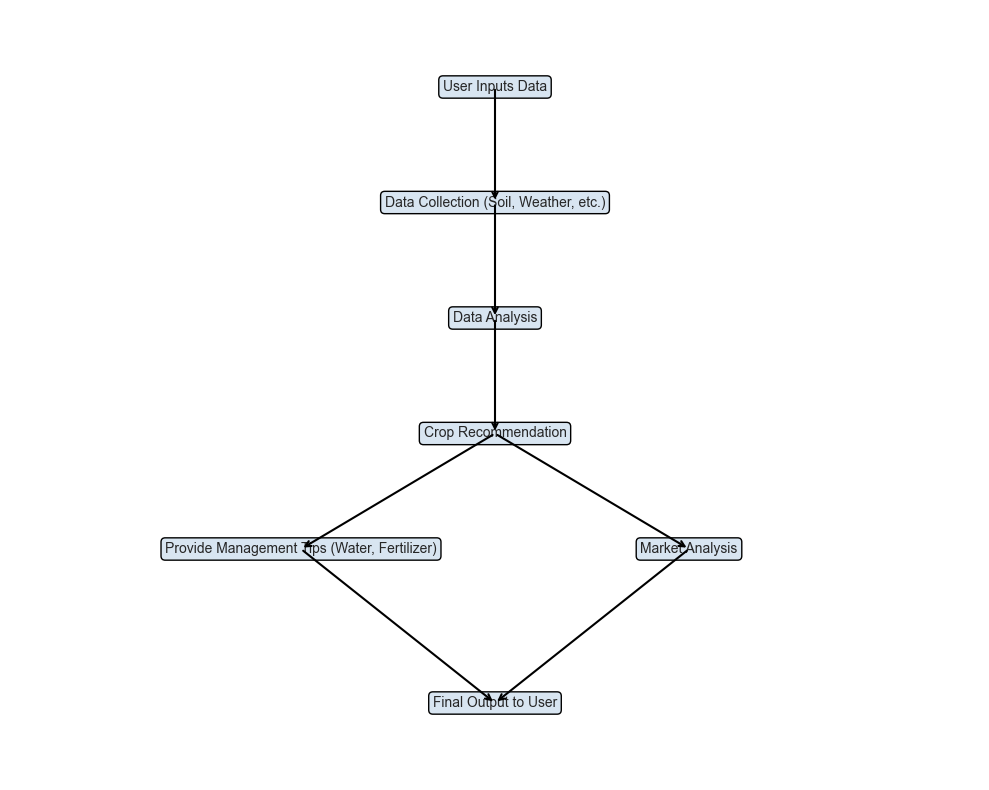

In [46]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')

# Define box and arrow properties
box_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="#D8E5F1")
arrow_props = dict(arrowstyle="->", color="black", lw=1.5)

# Add text boxes for the flowchart
positions = {
    "User Inputs Data": (0.5, 0.9),
    "Data Collection (Soil, Weather, etc.)": (0.5, 0.75),
    "Data Analysis": (0.5, 0.6),
    "Crop Recommendation": (0.5, 0.45),
    "Provide Management Tips (Water, Fertilizer)": (0.3, 0.3),
    "Market Analysis": (0.7, 0.3),
    "Final Output to User": (0.5, 0.1)
}

boxes = {}
for label, pos in positions.items():
    box = ax.text(pos[0], pos[1], label, ha="center", va="center", fontsize=10,
                  bbox=box_props, transform=ax.transAxes)
    boxes[label] = pos

# Draw arrows between boxes
arrows = [
    ("User Inputs Data", "Data Collection (Soil, Weather, etc.)"),
    ("Data Collection (Soil, Weather, etc.)", "Data Analysis"),
    ("Data Analysis", "Crop Recommendation"),
    ("Crop Recommendation", "Provide Management Tips (Water, Fertilizer)"),
    ("Crop Recommendation", "Market Analysis"),
    ("Provide Management Tips (Water, Fertilizer)", "Final Output to User"),
    ("Market Analysis", "Final Output to User")
]

for start, end in arrows:
    start_pos = boxes[start]
    end_pos = boxes[end]
    ax.annotate("", xy=end_pos, xycoords="axes fraction", 
                xytext=start_pos, textcoords="axes fraction",
                arrowprops=arrow_props)

plt.tight_layout()
plt.show()


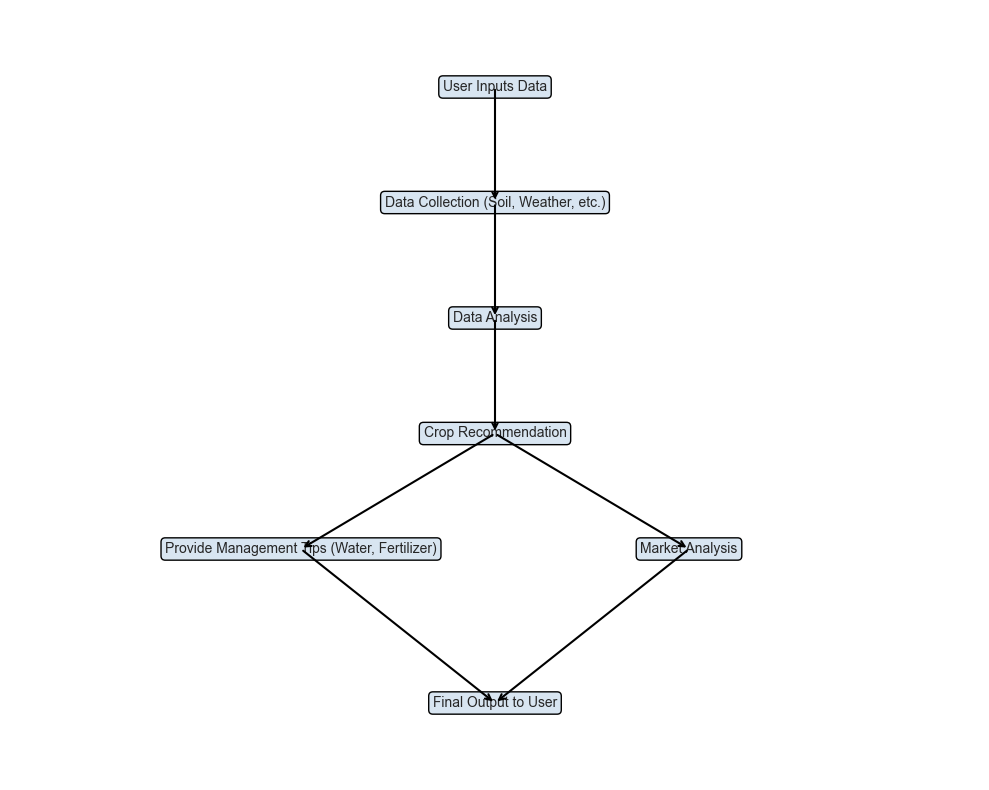

In [47]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')

# Define box and arrow properties
box_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="#D8E5F1")
arrow_props = dict(arrowstyle="->", color="black", lw=1.5)

# Add text boxes for the flowchart
positions = {
    "User Inputs Data": (0.5, 0.9),
    "Data Collection (Soil, Weather, etc.)": (0.5, 0.75),
    "Data Analysis": (0.5, 0.6),
    "Crop Recommendation": (0.5, 0.45),
    "Provide Management Tips (Water, Fertilizer)": (0.3, 0.3),
    "Market Analysis": (0.7, 0.3),
    "Final Output to User": (0.5, 0.1)
}

boxes = {}
for label, pos in positions.items():
    box = ax.text(pos[0], pos[1], label, ha="center", va="center", fontsize=10,
                  bbox=box_props, transform=ax.transAxes)
    boxes[label] = pos

# Draw arrows between boxes
arrows = [
    ("User Inputs Data", "Data Collection (Soil, Weather, etc.)"),
    ("Data Collection (Soil, Weather, etc.)", "Data Analysis"),
    ("Data Analysis", "Crop Recommendation"),
    ("Crop Recommendation", "Provide Management Tips (Water, Fertilizer)"),
    ("Crop Recommendation", "Market Analysis"),
    ("Provide Management Tips (Water, Fertilizer)", "Final Output to User"),
    ("Market Analysis", "Final Output to User")
]

for start, end in arrows:
    start_pos = boxes[start]
    end_pos = boxes[end]
    ax.annotate("", xy=end_pos, xycoords="axes fraction", 
                xytext=start_pos, textcoords="axes fraction",
                arrowprops=arrow_props)

plt.tight_layout()
plt.show()
